In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [2]:
def write_percentiles(filename, c):
	with open(filename, 'w') as f:
		f.write('values; percentile\n')
		for x, y in zip(c.xs, c.ps):
			f.write('%.2f, %.2f\n'%(x, y))

In [3]:
def print_percentiles(c, name):
	print('-----------------------------\n')
	print('percentile values distribution for %s\n' % name)

	print('50th Percentile:%f\n' % c.Percentile(50))
	print('90th Percentile:%f\n' % c.Percentile(90))
	print('99th Percentile:%f\n' % c.Percentile(99))
	print('25th Percentile:%f\n' % c.Percentile(25))
	print('75th Percentile:%f\n' % c.Percentile(75))
	print('20th Percentile:%f\n' % c.Percentile(50))
	print('40th Percentile:%f\n' % c.Percentile(90))
	print('60th Percentile:%f\n' % c.Percentile(99))
	print('80th Percentile:%f\n' % c.Percentile(25))

	print('-----------------------------\n')

In [4]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [6]:
quic_data = "./AWS_results/Mumbai/data/output_quic.csv"

In [7]:
tcol_names = ['TimeOfMeasurement', 'Url', 'Path', 'Ip', 'Port', 'DNSTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'Protocol']
as_names = ['Url', 'Ip', 'ASNo','ASName','Lat','Lon'] 

In [8]:
t = pd.read_csv(quic_data,';', names=tcol_names, header=None)

In [9]:
t = t.dropna()

In [10]:
asndata = "./data/pi-1/quic_perf/asinfo.csv"

In [11]:
asn = pd.read_csv(asndata, ',', names=as_names, header=None)
asn

,Url,Ip,ASNo,ASName,Lat,Lon
0,www.google.com,172.217.19.68,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,www.youtube.com,172.217.22.78,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,www.google.co.in,216.58.213.227,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
3,www.blogspot.com,172.217.18.9,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
4,www.google.co.jp,216.58.210.3,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
...,...,...,...,...,...,...
7428,www.holidaysequences.com,35.190.16.47,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
7429,www.nickzammeti.com,130.211.40.170,15169.0,GOOGLE - Google LLC,4.35,50.8500
7430,www.redlink-network.org,35.190.35.16,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
7431,www.reefh2o.com,35.190.16.47,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [12]:
#pd.set_option('display.max_rows', 500)
asn.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)


ASNo     ASName                                              
15169.0  GOOGLE - Google LLC                                     5040
15133.0  EDGECAST - MCI Communications Services                   557
7506.0   INTERQ GMO Internet                                      148
24940.0  HETZNER-AS - Hetzner Online GmbH                         126
16276.0  OVH - OVH SAS                                            102
                                                                 ... 
30148.0  SUCURI-SEC - Sucuri                                        1
48666.0  AS-MAROSNET - MAROSNET Telecommunication Company LLC       1
30860.0  YURTEH-AS - Virtual Systems LLC                            1
30933.0  PROTEXIA-EU - KDA WEB SERVICES LTD                         1
37907.0  DIGIROCK DigiRock                                          1
Length: 216, dtype: int64

In [13]:
asn.count()

Url       7433
Ip        7424
ASNo      7424
ASName    7424
Lat       7424
Lon       7424
dtype: int64

In [14]:
asn.head()

,Url,Ip,ASNo,ASName,Lat,Lon
0,www.google.com,172.217.19.68,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,www.youtube.com,172.217.22.78,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,www.google.co.in,216.58.213.227,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
3,www.blogspot.com,172.217.18.9,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
4,www.google.co.jp,216.58.210.3,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [15]:
t = t.join(asn.set_index('Url'), on='Url', rsuffix='_right')

In [16]:
t = t.drop('Ip_right', axis=1)

In [17]:
t.count()

TimeOfMeasurement              721382
Url                            721382
Path                           721382
Ip                             721382
Port                           721382
DNSTime                        721382
ConnectionEstablishmentTime    721382
TTFB                           721382
TotalDownloadTime              721382
HttpResponse                   721382
Protocol                       721382
ASNo                           562796
ASName                         562796
Lat                            562796
Lon                            562796
dtype: int64

In [18]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
0,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.199.129,443,173.387,125.274,511.025,60.569,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.199.129,443,0.693,125.736,579.538,878.539,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.199.129,443,0.753,125.767,602.459,918.512,404.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
8,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.199.129,443,71.259,128.807,577.817,879.955,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
9,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.199.129,443,1.193,135.858,628.999,930.813,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [19]:
def timestamp2human(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).strftime('%c')

In [20]:
#t['TimeOfMeasurement'] = t['TimeOfMeasurement'].apply(timestamp2human)

In [21]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
0,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.199.129,443,173.387,125.274,511.025,60.569,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.199.129,443,0.693,125.736,579.538,878.539,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.199.129,443,0.753,125.767,602.459,918.512,404.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
8,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.199.129,443,71.259,128.807,577.817,879.955,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
9,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.199.129,443,1.193,135.858,628.999,930.813,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [22]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
2050064,1.589990e+09,www.hqnetflixcookies.blogspot.com,/,216.58.203.161,443,120.259,166.214,819.493,819.552,301.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2050068,1.589990e+09,www.yyoossk.blogspot.com,/,216.58.203.161,443,84.050,162.605,491.129,491.186,301.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2050069,1.589990e+09,www.hqnetflixcookies.blogspot.com,/,216.58.203.161,443,36.078,205.196,574.523,574.576,301.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2050070,1.589990e+09,www.mexicocomic.blogspot.com,/,216.58.203.161,443,2.406,163.568,491.533,491.596,301.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2050071,1.589990e+09,www.yyoossk.blogspot.com,/,216.58.203.161,443,0.958,161.045,490.260,491.823,301.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [23]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [24]:
#quic4, quic6 = filter_by_ip(t, column = 'Ip')
quic4 = t[t['Ip'].str.contains("\.")]
quic6 = t[t['Ip'].str.contains("\:")]

In [25]:
quic4 = quic4[quic4['HttpResponse'] == 200.0]
quic6 = quic6[quic6['HttpResponse'] == 200.0]

In [26]:
quic4.count()

TimeOfMeasurement              161310
Url                            161310
Path                           161310
Ip                             161310
Port                           161310
DNSTime                        161310
ConnectionEstablishmentTime    161310
TTFB                           161310
TotalDownloadTime              161310
HttpResponse                   161310
Protocol                       161310
ASNo                           104562
ASName                         104562
Lat                            104562
Lon                            104562
dtype: int64

In [27]:
quic4.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
24,1.589587e+09,www.100negocios.com,/,66.198.240.11,443,922.571,419.492,112.632,606.883,200.0,Q043,NaN,NaN,NaN,NaN
25,1.589587e+09,www.100negocios.com,/,66.198.240.11,443,3.666,415.011,144.847,632.249,200.0,Q046,NaN,NaN,NaN,NaN
26,1.589587e+09,www.100negocios.com,/,66.198.240.11,443,0.728,413.455,96.477,594.103,200.0,Q050,NaN,NaN,NaN,NaN
120,1.589587e+09,www.1-link.org,/,78.142.29.4,443,535.450,324.205,547.710,557.430,200.0,Q043,206349.0,BLUEANGELHOST - BlueAngelHost Pvt. Ltd,23.3333,42.7
121,1.589587e+09,www.1-link.org,/,78.142.29.4,443,0.672,351.892,569.269,579.629,200.0,Q046,206349.0,BLUEANGELHOST - BlueAngelHost Pvt. Ltd,23.3333,42.7


In [28]:
quic6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
ASNo                           0
ASName                         0
Lat                            0
Lon                            0
dtype: int64

In [29]:
quic6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon


In [30]:
t.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)

ASNo      ASName                                   
15169.0   GOOGLE - Google LLC                          442310
15133.0   EDGECAST - MCI Communications Services        54480
35415.0   WEBZILLA - Webzilla B.V.                       5083
55293.0   A2HOSTING - A2 Hosting                         4873
203226.0  IHCRU - Internet-Hosting Ltd                   4495
                                                        ...  
63408.0   SHOPIFYASN2 - Shopify                            56
55720.0   GIGABIT-MY Gigabit Hosting Sdn Bhd               55
43754.0   ASIATECH - Asiatech Data Transfer Inc PLC        50
20473.0   AS-CHOOPA - Choopa                               27
47748.0   DATICUM - Daticum JSC                            24
Length: 85, dtype: int64

In [31]:
t.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)

ASNo      ASName                                   
15169.0   GOOGLE - Google LLC                          442310
15133.0   EDGECAST - MCI Communications Services        54480
35415.0   WEBZILLA - Webzilla B.V.                       5083
55293.0   A2HOSTING - A2 Hosting                         4873
203226.0  IHCRU - Internet-Hosting Ltd                   4495
                                                        ...  
63408.0   SHOPIFYASN2 - Shopify                            56
55720.0   GIGABIT-MY Gigabit Hosting Sdn Bhd               55
43754.0   ASIATECH - Asiatech Data Transfer Inc PLC        50
20473.0   AS-CHOOPA - Choopa                               27
47748.0   DATICUM - Daticum JSC                            24
Length: 85, dtype: int64

In [32]:
quic15169 = quic4.loc[t['ASNo'] == 15169]
quic15133 = quic4.loc[t['ASNo'] == 15133]
quic55293= quic4.loc[t['ASNo'] == 55293]
quic35415 = quic4.loc[t['ASNo'] == 35415]
quic203226 = quic4.loc[t['ASNo'] == 203226]

In [33]:
quic15169.count()

TimeOfMeasurement              41663
Url                            41663
Path                           41663
Ip                             41663
Port                           41663
DNSTime                        41663
ConnectionEstablishmentTime    41663
TTFB                           41663
TotalDownloadTime              41663
HttpResponse                   41663
Protocol                       41663
ASNo                           41663
ASName                         41663
Lat                            41663
Lon                            41663
dtype: int64

In [34]:
quic15133.count()

TimeOfMeasurement              33226
Url                            33226
Path                           33226
Ip                             33226
Port                           33226
DNSTime                        33226
ConnectionEstablishmentTime    33226
TTFB                           33226
TotalDownloadTime              33226
HttpResponse                   33226
Protocol                       33226
ASNo                           33226
ASName                         33226
Lat                            33226
Lon                            33226
dtype: int64

In [35]:
quic15133.count()

TimeOfMeasurement              33226
Url                            33226
Path                           33226
Ip                             33226
Port                           33226
DNSTime                        33226
ConnectionEstablishmentTime    33226
TTFB                           33226
TotalDownloadTime              33226
HttpResponse                   33226
Protocol                       33226
ASNo                           33226
ASName                         33226
Lat                            33226
Lon                            33226
dtype: int64

In [36]:
quic55293.count()

TimeOfMeasurement              2760
Url                            2760
Path                           2760
Ip                             2760
Port                           2760
DNSTime                        2760
ConnectionEstablishmentTime    2760
TTFB                           2760
TotalDownloadTime              2760
HttpResponse                   2760
Protocol                       2760
ASNo                           2760
ASName                         2760
Lat                            2760
Lon                            2760
dtype: int64

In [37]:
quic35415.count()

TimeOfMeasurement              1024
Url                            1024
Path                           1024
Ip                             1024
Port                           1024
DNSTime                        1024
ConnectionEstablishmentTime    1024
TTFB                           1024
TotalDownloadTime              1024
HttpResponse                   1024
Protocol                       1024
ASNo                           1024
ASName                         1024
Lat                            1024
Lon                            1024
dtype: int64

In [38]:
quic15169_6 = quic6.loc[t['ASNo'] == 15169]
quic15133_6 = quic6.loc[t['ASNo'] == 15133]
quic55293_6 = quic6.loc[t['ASNo'] == 55293]
quic35415_6 = quic6.loc[t['ASNo'] == 35415]
quic203226_6 = quic6.loc[t['ASNo'] == 203226]

In [39]:
quic15169_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
ASNo                           0
ASName                         0
Lat                            0
Lon                            0
dtype: int64

In [40]:
quic15133.count()

TimeOfMeasurement              33226
Url                            33226
Path                           33226
Ip                             33226
Port                           33226
DNSTime                        33226
ConnectionEstablishmentTime    33226
TTFB                           33226
TotalDownloadTime              33226
HttpResponse                   33226
Protocol                       33226
ASNo                           33226
ASName                         33226
Lat                            33226
Lon                            33226
dtype: int64

In [41]:
x = Cdf.MakeCdfFromList(quic15169['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic15133['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic55293['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic35415['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic203226['ConnectionEstablishmentTime'].values)

In [42]:
print_percentiles(x1, 'quic15133')
print_percentiles(x3, 'quic55293')
print_percentiles(x4, 'quic35415')
print_percentiles(x5, 'quic203226')
print_percentiles(x, 'quic15169')

-----------------------------

percentile values distribution for quic15133

50th Percentile:41.617000

90th Percentile:193.970000

99th Percentile:900.646000

25th Percentile:8.199000

75th Percentile:79.634000

20th Percentile:41.617000

40th Percentile:193.970000

60th Percentile:900.646000

80th Percentile:8.199000

-----------------------------

-----------------------------

percentile values distribution for quic55293

50th Percentile:413.041000

90th Percentile:489.255000

99th Percentile:800.052000

25th Percentile:407.556000

75th Percentile:449.883000

20th Percentile:413.041000

40th Percentile:489.255000

60th Percentile:800.052000

80th Percentile:407.556000

-----------------------------

-----------------------------

percentile values distribution for quic35415

50th Percentile:246.484000

90th Percentile:288.184000

99th Percentile:756.179000

25th Percentile:240.581000

75th Percentile:283.660000

20th Percentile:246.484000

40th Percentile:288.184000

60th Percentil

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


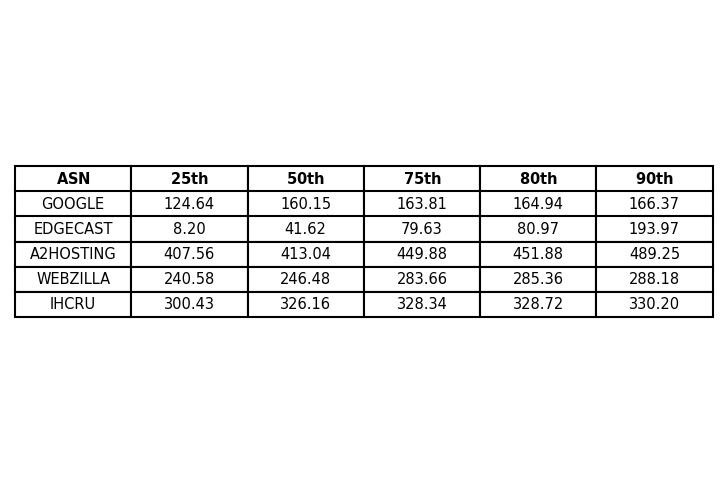

In [43]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'WEBZILLA', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x4.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x4.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x4.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x4.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x4.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/Mumbai/ASN/handshake_times_IPv4_asno_percentile.png', format='png', bbox_inches='tight')


In [44]:
write_percentiles('quic15133.csv', x1)
write_percentiles('quic55293.csv', x3)
write_percentiles('quic35415.csv', x4)
write_percentiles('quic203226.csv', x5)
write_percentiles('quic15169.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


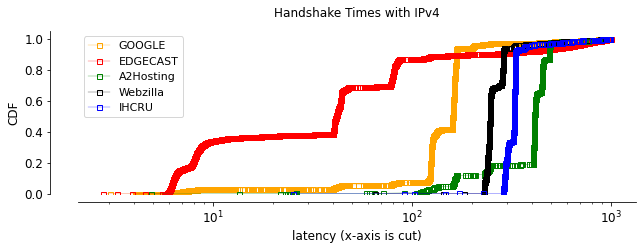

In [45]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
##ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'Webzilla', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/ASN/handshake_times_IPv4_asno.png', format='png', bbox_inches='tight')


In [46]:
x = Cdf.MakeCdfFromList(quic15169['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic15133['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic55293['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic35415['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic203226['TTFB'].values)

In [47]:
print_percentiles(x1, 'quic15133')
print_percentiles(x3, 'quic55293')
print_percentiles(x4, 'quic35415')
print_percentiles(x5, 'quic203226')
print_percentiles(x, 'quic15169')

-----------------------------

percentile values distribution for quic15133

50th Percentile:244.486000

90th Percentile:739.194000

99th Percentile:975.966000

25th Percentile:80.665000

75th Percentile:517.065000

20th Percentile:244.486000

40th Percentile:739.194000

60th Percentile:975.966000

80th Percentile:80.665000

-----------------------------

-----------------------------

percentile values distribution for quic55293

50th Percentile:618.585000

90th Percentile:735.502000

99th Percentile:960.112000

25th Percentile:375.956000

75th Percentile:658.358000

20th Percentile:618.585000

40th Percentile:735.502000

60th Percentile:960.112000

80th Percentile:375.956000

-----------------------------

-----------------------------

percentile values distribution for quic35415

50th Percentile:406.362000

90th Percentile:455.580000

99th Percentile:807.853000

25th Percentile:367.661000

75th Percentile:421.760000

20th Percentile:406.362000

40th Percentile:455.580000

60th Perc

In [48]:
write_percentiles('quic15133.csv', x1)
write_percentiles('quic55293.csv', x3)
write_percentiles('quic35415.csv', x4)
write_percentiles('quic203226.csv', x5)
write_percentiles('quic15169.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


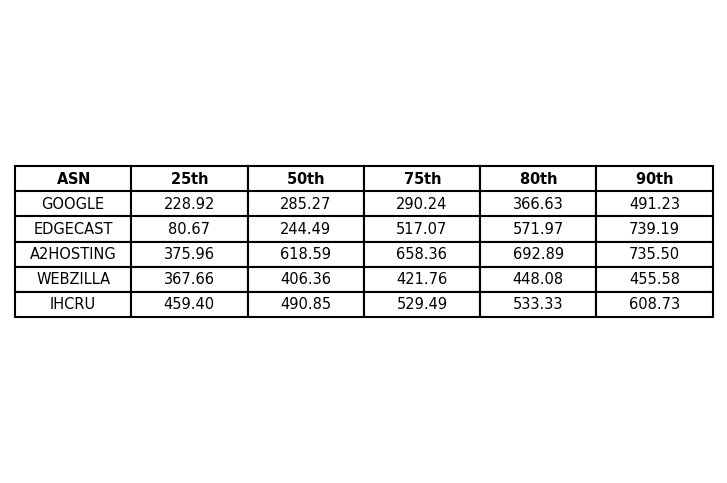

In [49]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'WEBZILLA', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x4.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x4.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x4.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x4.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x4.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/Mumbai/ASN/TTFB_ipv4_asno_percentile.png', format='png', bbox_inches='tight')

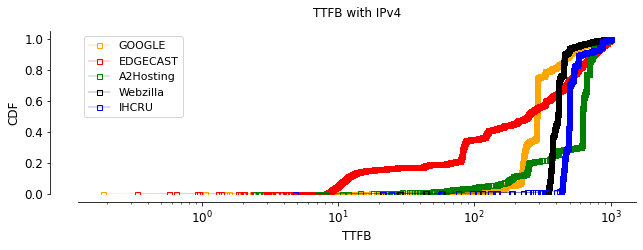

In [50]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'Webzilla', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/ASN/TTFB_ipv4_asno.png', format='png', bbox_inches='tight')

In [51]:
x = Cdf.MakeCdfFromList(quic15169['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic15133['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic55293['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic35415['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic203226['TotalDownloadTime'].values)

In [52]:
print_percentiles(x1, 'quic15133')
print_percentiles(x3, 'quic55293')
print_percentiles(x4, 'quic35415')
print_percentiles(x5, 'quic203226')
print_percentiles(x, 'quic15169')

-----------------------------

percentile values distribution for quic15133

50th Percentile:284.869000

90th Percentile:845.979000

99th Percentile:983.017000

25th Percentile:98.891000

75th Percentile:613.959000

20th Percentile:284.869000

40th Percentile:845.979000

60th Percentile:983.017000

80th Percentile:98.891000

-----------------------------

-----------------------------

percentile values distribution for quic55293

50th Percentile:635.002000

90th Percentile:900.967000

99th Percentile:982.603000

25th Percentile:287.387000

75th Percentile:739.052000

20th Percentile:635.002000

40th Percentile:900.967000

60th Percentile:982.603000

80th Percentile:287.387000

-----------------------------

-----------------------------

percentile values distribution for quic35415

50th Percentile:482.551000

90th Percentile:611.843000

99th Percentile:873.736000

25th Percentile:397.894000

75th Percentile:536.068000

20th Percentile:482.551000

40th Percentile:611.843000

60th Perc

In [53]:
write_percentiles('quic15133.csv', x1)
write_percentiles('quic55293.csv', x3)
write_percentiles('quic35415.csv', x4)
write_percentiles('quic203226.csv', x5)
write_percentiles('quic15169.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


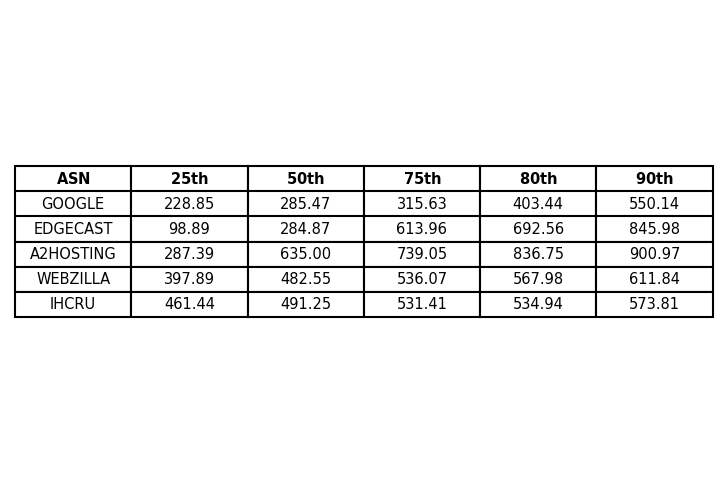

In [54]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'WEBZILLA', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x4.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x4.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x4.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x4.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x4.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/Mumbai/ASN/TotalDownloadTime_ipv4_asno_percentile.png', format='png', bbox_inches='tight')

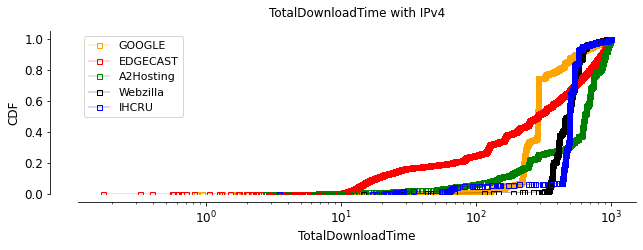

In [55]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'Webzilla', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/ASN/TotalDownloadTime_ipv4_asno.png', format='png', bbox_inches='tight')

In [56]:
#GOOGLE
quic46 = quic15169.loc[t['Protocol'] == 'Q046']
quic43 = quic15169.loc[t['Protocol'] == 'Q043']
quic50 = quic15169.loc[t['Protocol'] == 'Q050']
quich24 = quic15169.loc[t['Protocol'] == 'FF000018']

In [57]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['ConnectionEstablishmentTime'].values)

In [58]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:159.983000

90th Percentile:166.284000

99th Percentile:735.912000

25th Percentile:124.604000

75th Percentile:163.626000

20th Percentile:159.983000

40th Percentile:166.284000

60th Percentile:735.912000

80th Percentile:124.604000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:160.015000

90th Percentile:166.355000

99th Percentile:776.799000

25th Percentile:124.652000

75th Percentile:163.813000

20th Percentile:160.015000

40th Percentile:166.355000

60th Percentile:776.799000

80th Percentile:124.652000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:160.635000

90th Percentile:166.444000

99th Percentile:679.635000

25th Percentile:124.664000

75th Percentile:163.959000

20th Percentile:160.635000

40th Percentile:166.444000

60th Percentile:679.63

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


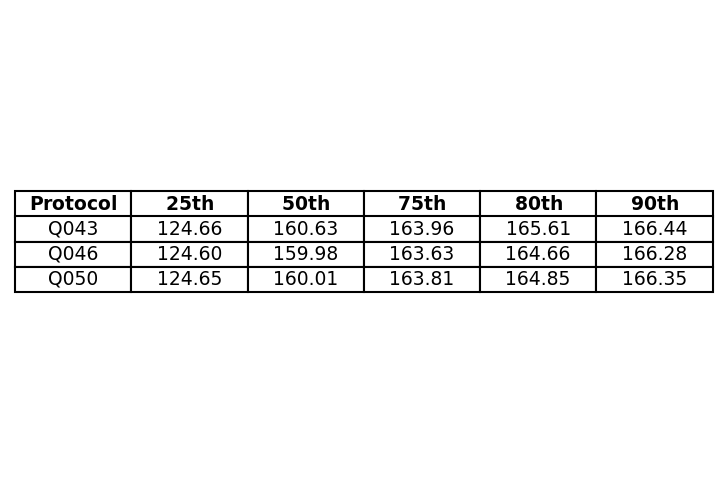

In [59]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/Mumbai/ASN/handshake_times_ipv4_asn15169_percentile.png', format='png', bbox_inches='tight')

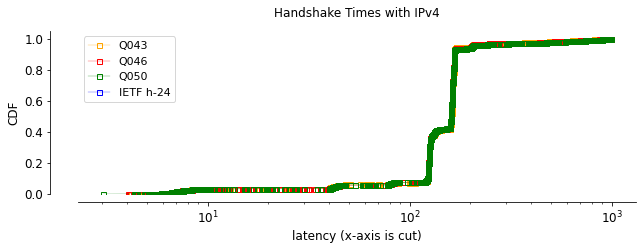

In [60]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Qh24
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF h-24'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/ASN/handshake_times_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [61]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24['TTFB'].values)

In [62]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:284.936000

90th Percentile:489.661000

99th Percentile:856.319000

25th Percentile:227.591000

75th Percentile:288.577000

20th Percentile:284.936000

40th Percentile:489.661000

60th Percentile:856.319000

80th Percentile:227.591000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:284.907000

90th Percentile:489.758000

99th Percentile:855.659000

25th Percentile:227.171000

75th Percentile:288.472000

20th Percentile:284.907000

40th Percentile:489.758000

60th Percentile:855.659000

80th Percentile:227.171000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:285.966000

90th Percentile:496.048000

99th Percentile:859.123000

25th Percentile:232.795000

75th Percentile:328.177000

20th Percentile:285.966000

40th Percentile:496.048000

60th Percentile:859.12

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


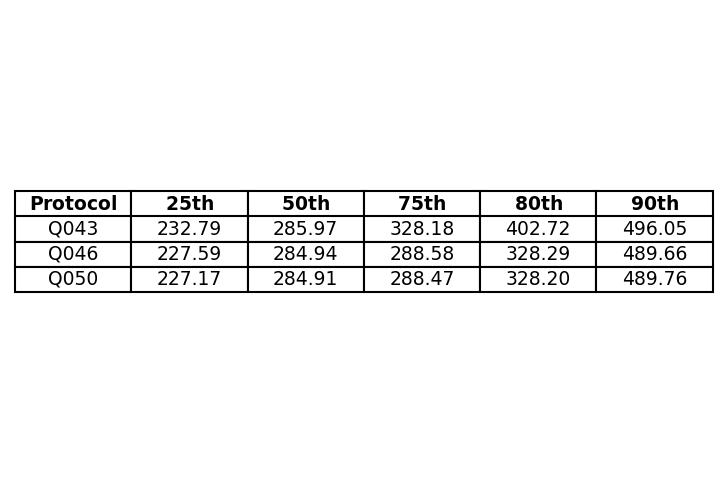

In [63]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/Mumbai/ASN/handshake_times_ipv4_asn15169_percentile.png', format='png', bbox_inches='tight')

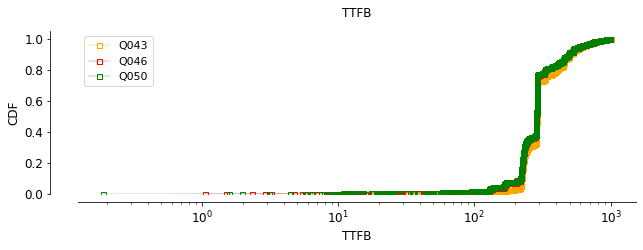

In [64]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/ASN/TTFB_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [65]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['TotalDownloadTime'].values)

In [66]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:285.181000

90th Percentile:540.961000

99th Percentile:928.226000

25th Percentile:227.717000

75th Percentile:289.307000

20th Percentile:285.181000

40th Percentile:540.961000

60th Percentile:928.226000

80th Percentile:227.717000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:285.145000

90th Percentile:534.148000

99th Percentile:929.383000

25th Percentile:227.228000

75th Percentile:288.780000

20th Percentile:285.145000

40th Percentile:534.148000

60th Percentile:929.383000

80th Percentile:227.228000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:286.131000

90th Percentile:571.223000

99th Percentile:939.535000

25th Percentile:232.116000

75th Percentile:365.199000

20th Percentile:286.131000

40th Percentile:571.223000

60th Percentile:939.53

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


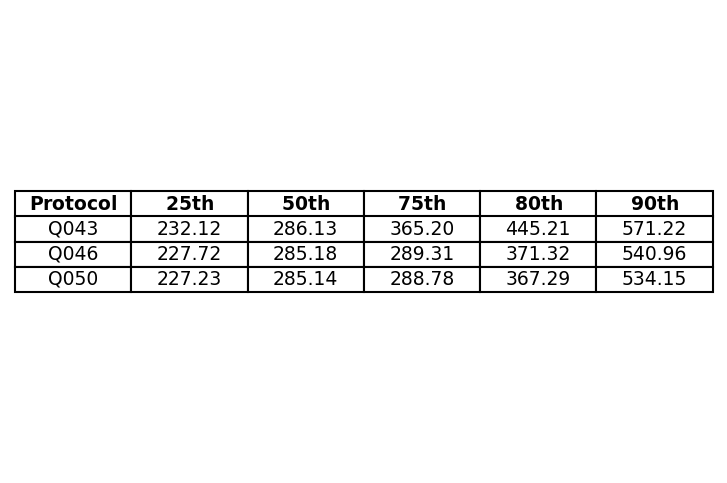

In [67]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/Mumbai/ASN/total_download_time_ipv4_asn15169_percentile.png', format='png', bbox_inches='tight')

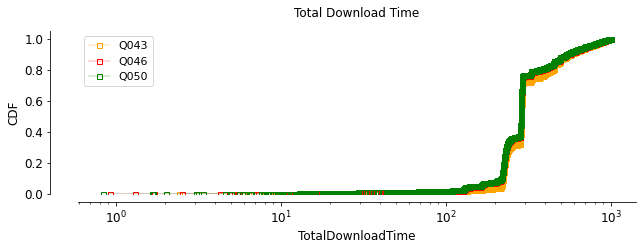

In [68]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Total Download Time', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/ASN/total_download_time_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [69]:
#Edgecast
quic44 = quic15133.loc[t['Protocol'] == 'Q046']
quic43 = quic15133.loc[t['Protocol'] == 'Q043']
quic39 = quic15133.loc[t['Protocol'] == 'Q050']
quic35 = quic15133.loc[t['Protocol'] == 'FF000018']

In [70]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['ConnectionEstablishmentTime'].values)

In [71]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:159.983000

90th Percentile:166.284000

99th Percentile:735.912000

25th Percentile:124.604000

75th Percentile:163.626000

20th Percentile:159.983000

40th Percentile:166.284000

60th Percentile:735.912000

80th Percentile:124.604000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:160.015000

90th Percentile:166.355000

99th Percentile:776.799000

25th Percentile:124.652000

75th Percentile:163.813000

20th Percentile:160.015000

40th Percentile:166.355000

60th Percentile:776.799000

80th Percentile:124.652000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:40.623000

90th Percentile:149.892000

99th Percentile:899.932000

25th Percentile:8.243000

75th Percentile:45.724000

20th Percentile:40.623000

40th Percentile:149.892000

60th Percentile:899.932000


findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


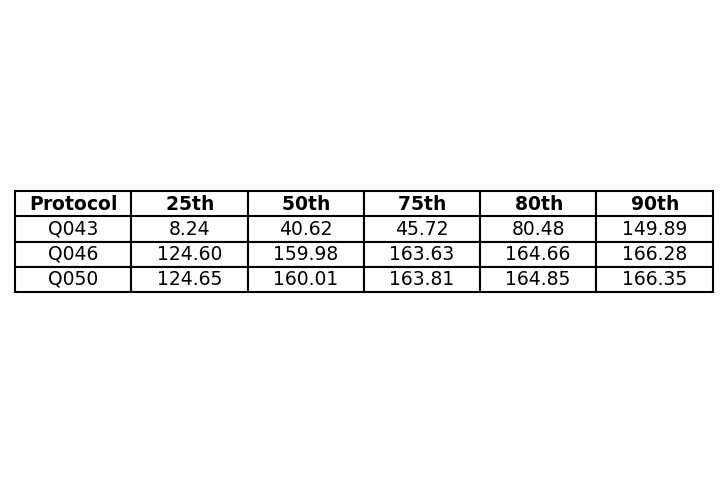

In [72]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/Mumbai/ASN/handshake_times_ipv4_asn15133_percentile.png', format='png', bbox_inches='tight')

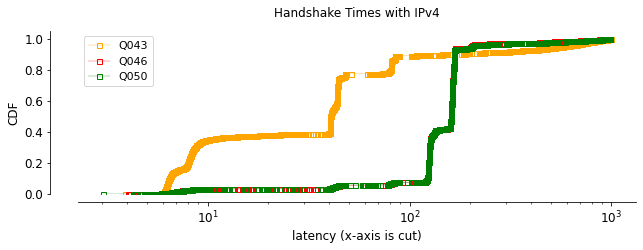

In [73]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/ASN/handshake_times_ipv4_asn15133.png', format='png', bbox_inches='tight')


In [74]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24['TTFB'].values)

In [75]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:284.936000

90th Percentile:489.661000

99th Percentile:856.319000

25th Percentile:227.591000

75th Percentile:288.577000

20th Percentile:284.936000

40th Percentile:489.661000

60th Percentile:856.319000

80th Percentile:227.591000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:284.907000

90th Percentile:489.758000

99th Percentile:855.659000

25th Percentile:227.171000

75th Percentile:288.472000

20th Percentile:284.907000

40th Percentile:489.758000

60th Percentile:855.659000

80th Percentile:227.171000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:295.535000

90th Percentile:780.892000

99th Percentile:980.092000

25th Percentile:108.181000

75th Percentile:578.002000

20th Percentile:295.535000

40th Percentile:780.892000

60th Percentile:980.09

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


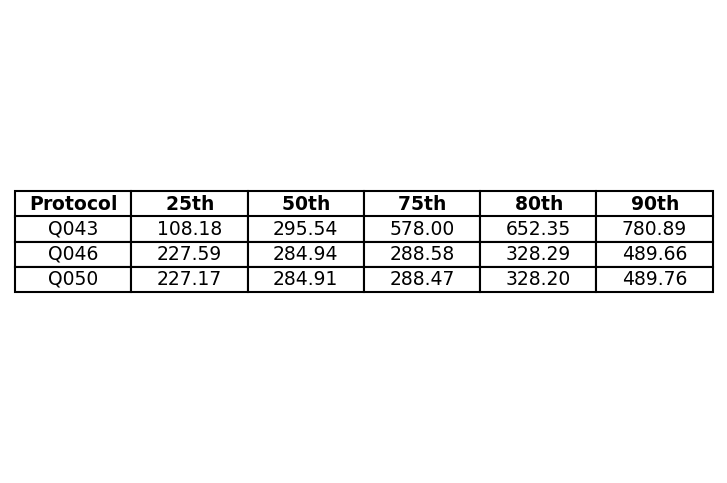

In [76]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/Mumbai/ASN/TTFB_ipv4_asn15133_percentile.png', format='png', bbox_inches='tight')


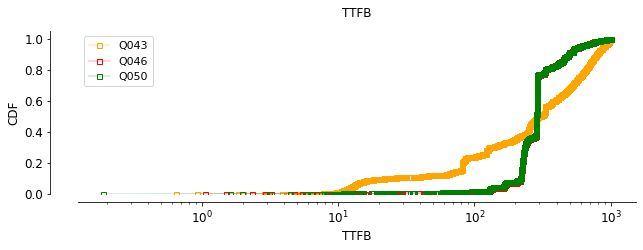

In [77]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h4
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/ASN/TTFB_ipv4_asn15133.png', format='png', bbox_inches='tight')


In [78]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['TotalDownloadTime'].values)

In [79]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:285.181000

90th Percentile:540.961000

99th Percentile:928.226000

25th Percentile:227.717000

75th Percentile:289.307000

20th Percentile:285.181000

40th Percentile:540.961000

60th Percentile:928.226000

80th Percentile:227.717000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:285.145000

90th Percentile:534.148000

99th Percentile:929.383000

25th Percentile:227.228000

75th Percentile:288.780000

20th Percentile:285.145000

40th Percentile:534.148000

60th Percentile:929.383000

80th Percentile:227.228000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:361.255000

90th Percentile:863.330000

99th Percentile:984.560000

25th Percentile:125.866000

75th Percentile:679.672000

20th Percentile:361.255000

40th Percentile:863.330000

60th Percentile:984.56

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


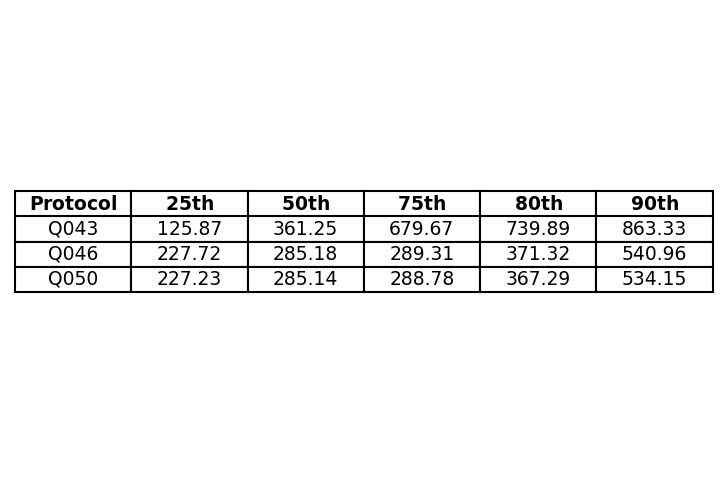

In [80]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }   

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/Mumbai/ASN/Total_Download_time_ipv4_asn15133_percentile.png', format='png', bbox_inches='tight')

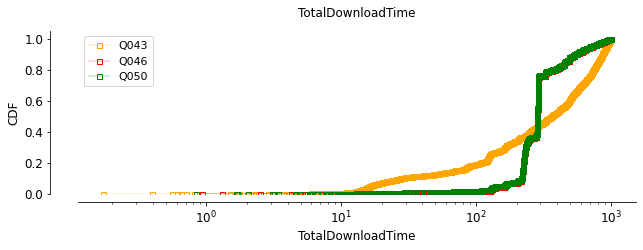

In [81]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/ASN/Total_Download_time_ipv4_asn15133.png', format='png', bbox_inches='tight')



In [82]:
# IHCRU - Internet-Hosting Ltd
quic203226 = quic4.loc[t['ASNo'] == 203226]
quic46 = quic203226.loc[t['Protocol'] == 'Q046']
quic43 = quic203226.loc[t['Protocol'] == 'Q043']
quic50 = quic203226.loc[t['Protocol'] == 'Q050']
quich24 = quic203226.loc[t['Protocol'] == 'FF000018']

In [83]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['ConnectionEstablishmentTime'].values)

print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


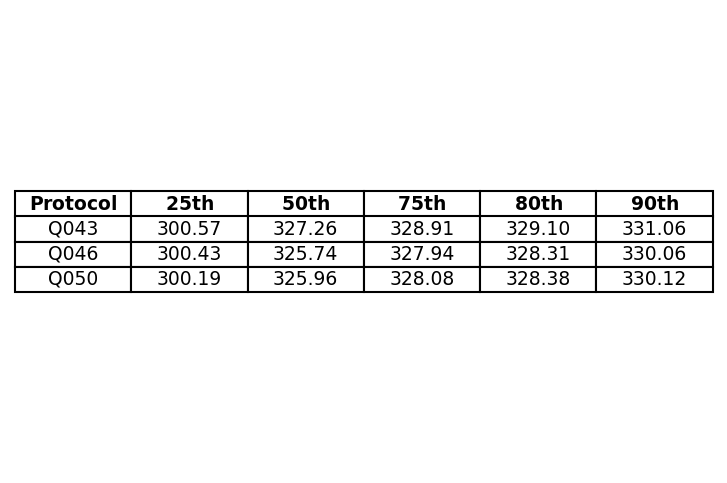

In [84]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/Mumbai/ASN/handshake_times_ipv4_asn203226_percentile.png', format='png', bbox_inches='tight')

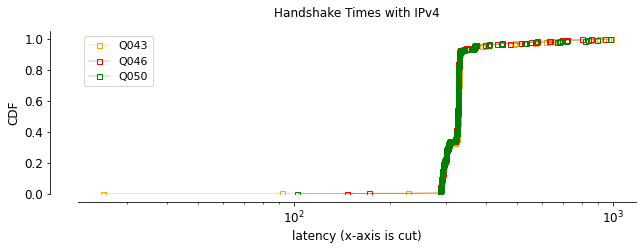

In [85]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/ASN/handshake_times_ipv4_asn203226.png', format='png', bbox_inches='tight')


In [86]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24['TTFB'].values)

In [87]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:490.806000

90th Percentile:576.616000

99th Percentile:884.064000

25th Percentile:463.746000

75th Percentile:528.188000

20th Percentile:490.806000

40th Percentile:576.616000

60th Percentile:884.064000

80th Percentile:463.746000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:490.510000

90th Percentile:610.576000

99th Percentile:909.413000

25th Percentile:459.338000

75th Percentile:530.027000

20th Percentile:490.510000

40th Percentile:610.576000

60th Percentile:909.413000

80th Percentile:459.338000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:491.238000

90th Percentile:656.850000

99th Percentile:904.852000

25th Percentile:458.794000

75th Percentile:530.580000

20th Percentile:491.238000

40th Percentile:656.850000

60th Percentile:904.85

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


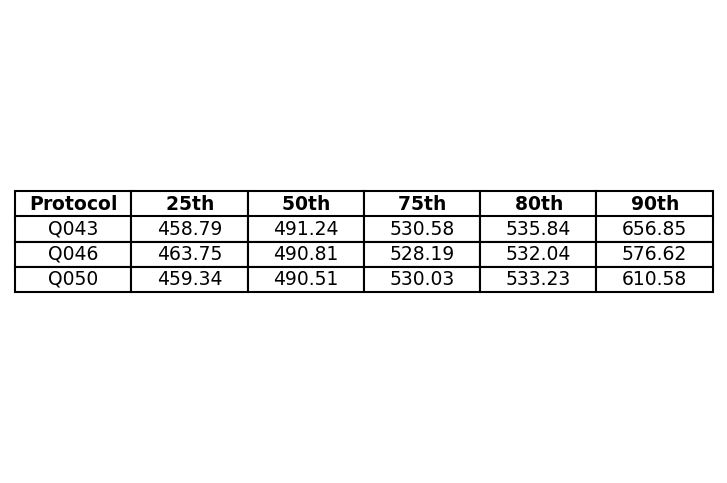

In [88]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/Mumbai/ASN/ttfb_ipv4_asn203226_percentile.png', format='png', bbox_inches='tight')

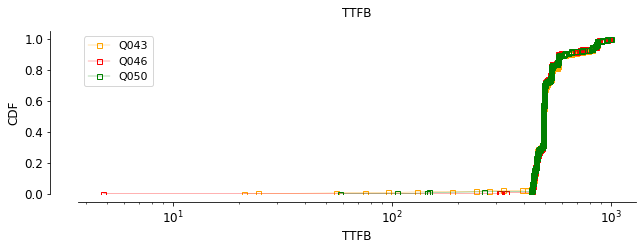

In [89]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q=h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/ASN/ttfb_ipv4_asn203226.png', format='png', bbox_inches='tight')


In [90]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['TotalDownloadTime'].values)

In [91]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:491.079000

90th Percentile:574.464000

99th Percentile:884.098000

25th Percentile:462.210000

75th Percentile:530.833000

20th Percentile:491.079000

40th Percentile:574.464000

60th Percentile:884.098000

80th Percentile:462.210000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:490.982000

90th Percentile:573.575000

99th Percentile:946.598000

25th Percentile:462.503000

75th Percentile:532.155000

20th Percentile:490.982000

40th Percentile:573.575000

60th Percentile:946.598000

80th Percentile:462.503000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:491.543000

90th Percentile:572.552000

99th Percentile:980.912000

25th Percentile:457.559000

75th Percentile:531.500000

20th Percentile:491.543000

40th Percentile:572.552000

60th Percentile:980.91

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


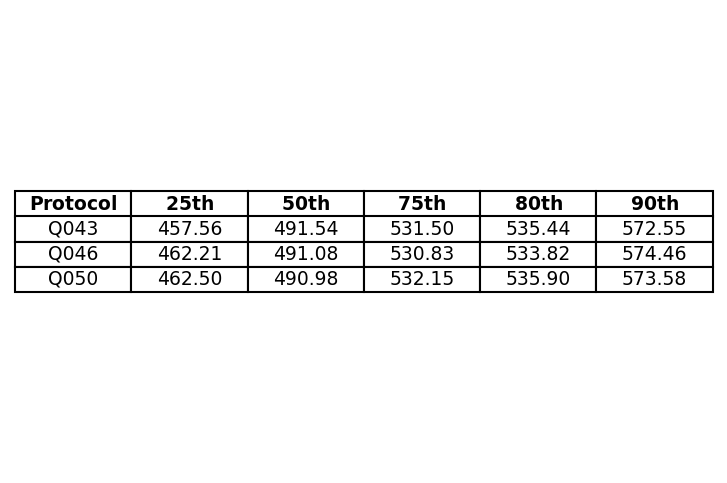

In [92]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./AWS/Mumbai/ASN/totaldownloadtime_ipv4_asn203226_percentile.png', format='png', bbox_inches='tight')


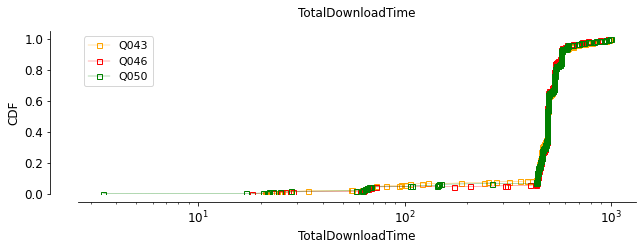

In [93]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/ASN/totaldownloadtime_ipv4_asn203226.png', format='png', bbox_inches='tight')
